<a href="https://colab.research.google.com/github/MaggieWelch/linearRegression/blob/main/Linear_Regression_MW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Linear Regression
# Do Q1 and one other question (I am doing Q0 & Q1)

# Q0: Please answer the following questions in your own words

1. What makes a model "linear"? "Linear" in what?

A model is linear if it has a linear relationship between the chosed predictive variables and the outcome. "linear relationship" is when a variable impacts the outcome in a consistent way across the data. When the relationship is plotted, a stright line would appear displaying the consistent change between the variables.

2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)

If there is an intercept, the coefficient represents the difference in outcome for a variable when compared to the reference category. If there is no intercept, the coeffient is consistent with that of the mean of the variable.

3. Can linear regression be used for classification? Explain why, or why not.

No it cannot. Classification includes sorting things into categories, while linear regressions predicts numerical outcomes. Linear regression produces numbers, which is not the purpose of classification.

4. What are signs that your linear model is over-fitting?

Overfitting can be seen when the model performs well on the training data, but poorly on the test data. This indicates that it was trained on the data improperly and learned too many specific deatils about the training set that are not generalizable to the rest of the data.

5. Clearly explain multi-colinearity using the two-stage least squares technique.

Multi-colinarity is when two predictor variables are highly related, making it difficult to see individual effects. Two-stage least squares assists by separating the overlap influence so the model can better understand the predictor variables individually.

6. What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable y and your features/control/response/independent variables X?

Two ways to incorporate nonlinear relationships between your outcome and response variable are to add polynomial terms, or apply transformations. For polynomial terms, this may include squaring the variables to account for curves. Transformations include taking the log of a variable. Both of these can be used to capture non-linear patterns in the data.

7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

The intercept is the predicted value of the y dependent variable outcome, when all independent variables X are equal to 0. It is the baseline of the dependent variable. A slope coefficient for a variable X shows how much y is expected to change with a one-unit increase in X. The coefficient for a dummy/one-hot-encoded variable represents the difference in the expected value of y between the category represented by the dummy variable and the reference category. This coefficient allows for comparisons across different groups.


# Q1:
1. Compute the average prices and scores by Neighbourhood ; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by Neighbourhood .

In [41]:
import pandas as pd
url = 'https://raw.githubusercontent.com/DS3001/linearRegression/refs/heads/main/data/Q1_clean.csv'
df = pd.read_csv(url)
print(df.head())

   Price  Review Scores Rating Neighbourhood  Property Type        Room Type
0    549                  96.0      Manhattan     Apartment     Private room
1    149                 100.0       Brooklyn     Apartment  Entire home/apt
2    250                 100.0      Manhattan     Apartment  Entire home/apt
3     90                  94.0       Brooklyn     Apartment     Private room
4    270                  90.0      Manhattan     Apartment  Entire home/apt


In [42]:
print(df.shape)
print(df.isna().sum())
print(df.dtypes)

(22153, 5)
Price                   0
Review Scores Rating    0
Neighbourhood           0
Property Type           0
Room Type               0
dtype: int64
Price                     int64
Review Scores Rating    float64
Neighbourhood            object
Property Type            object
Room Type                object
dtype: object


In [43]:
#renaming neighbourhood variable
df = df.rename(columns={'Neighbourhood ':'Neighborhood'})
print(df.columns)

Index(['Price', 'Review Scores Rating', 'Neighborhood', 'Property Type',
       'Room Type'],
      dtype='object')


                avg_price  avg_score
Neighborhood                        
Manhattan      183.664286  91.801496
Staten Island  146.166667  90.843750
Brooklyn       127.747378  92.363497
Queens          96.857233  91.549057
Bronx           75.276498  91.654378
The most expensive neighbourhood on average is Manhattan with an average price of $183.66


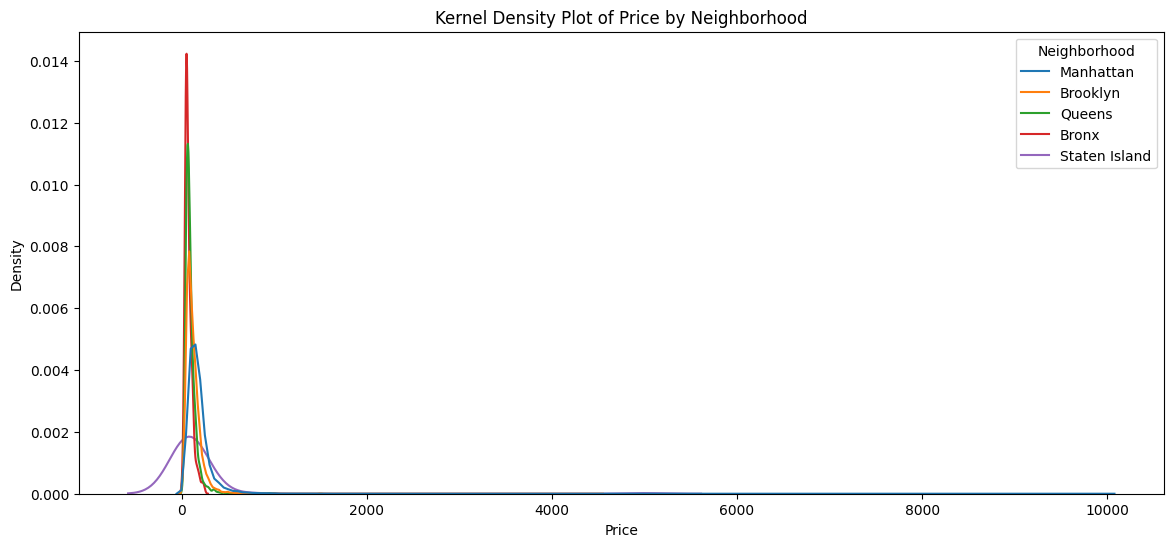

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute average price and scores by Neighbourhood
avg_data = df.groupby('Neighborhood').agg(
    avg_price=('Price', 'mean'),
    avg_score=('Review Scores Rating', 'mean')
).sort_values(by='avg_price', ascending=False)
print(avg_data)

# Determine the most expensive Neighborhood
most_expensive_neighbourhood = avg_data.index[0]
most_expensive_avg_price = avg_data['avg_price'].iloc[0]
print(f"The most expensive neighbourhood on average is {most_expensive_neighbourhood} with an average price of ${most_expensive_avg_price:.2f}")

# Kernel density plot for Price by Neighborhood
plt.figure(figsize=(14, 6))
sns.kdeplot(data=df, x='Price', hue='Neighborhood', common_norm=False)
plt.title('Kernel Density Plot of Price by Neighborhood')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

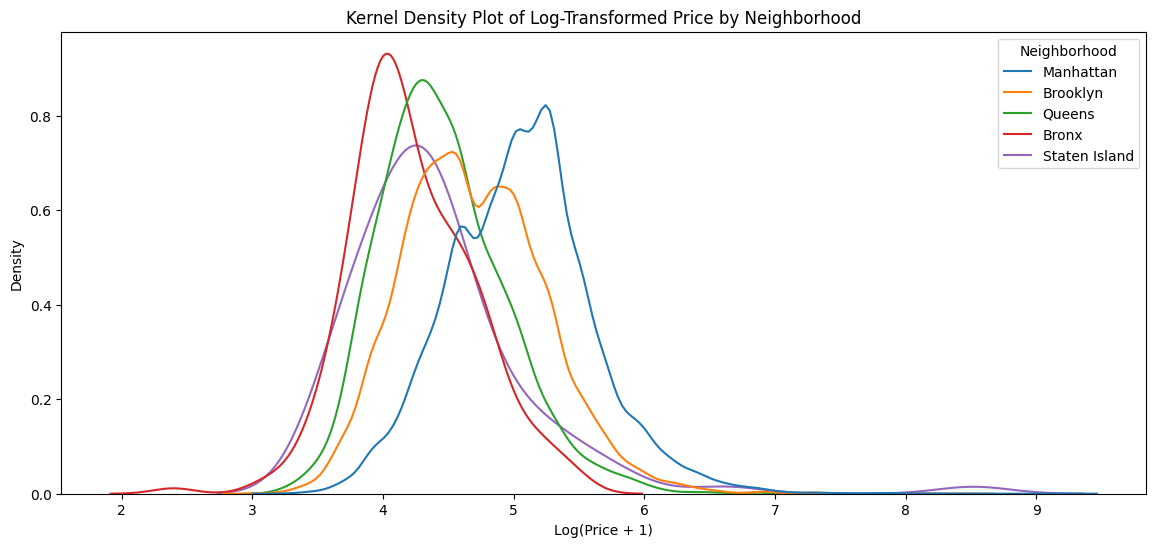

In [45]:
# Kernel density plot for log-transformed Price by Neighborhood
df['log_price'] = np.log(df['Price'] + 1)  # Add 1 to avoid log(0)
plt.figure(figsize=(14, 6))
sns.kdeplot(data=df, x='log_price', hue='Neighborhood', common_norm=False)
plt.title('Kernel Density Plot of Log-Transformed Price by Neighborhood')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Density')
plt.show()


2. Regress price on Neighbourhood  by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [50]:
y = df['Price']
X = pd.get_dummies(df['Neighborhood'], dtype='int')
#run regression
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print(results)



,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


When comparing the regression coefficient to the table of means in part 1, they are the same. The observed pattern is that the regression coefficient is the same as the average price for each respective neighborhood. From this, it is clear that when regressing a continuous variable like price on a single category without an intercept, the coefficients estimate the mean of the continuous variable within each level of the categorical data separatley.

3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?


In [56]:
y = df['Price']
X = pd.get_dummies(df['Neighborhood'], dtype='int', drop_first = True)

from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X,y)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print(results)
print(' ')
print(f"The intercept is {reg.intercept_}")


        variable  coefficient
0       Brooklyn    52.470881
1      Manhattan   108.387789
2         Queens    21.580735
3  Staten Island    70.890169
 
The intercept is 75.27649769585331


When creating the dummies, we now have drop_first = True. This drops a variable, in this case the Bronx, and uses it as a baseline. The Bronx's coefficient (same as average price) from the first regression is now the value of the intercept. The other coeffieients from this regression are now dependant on their relationship to the prices of the Bronx. You can get the coefficients from part 2 by adding their current coefficients to the intercept, as their current coeffients are how they differ from the price of the Bronx.

4. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood . What is the R^2
 and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [57]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighborhood'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100) # For replication purposes

Z_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Neighborhood'], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighborhood'], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results
print(" ")


Rsq:  0.06701086106947296
RMSE:  125.01092061382933


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


In [62]:
100*1.032257 + 89.421

192.6467

The most expensive property you can rent is a 100-rated stay in Manhattan for about $192.65

5. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood  and Room Type. What is the R^2
 and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [65]:
y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighborhood', 'Room Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100)

Z_train = pd.concat([X_train['Review Scores Rating'],
                    pd.get_dummies(X_train['Neighborhood'], dtype='int'),
                    pd.get_dummies(X_train['Room Type'], dtype='int')],
                    axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighborhood'], dtype='int'),
                    pd.get_dummies(X_test['Room Type'], dtype='int')],
                    axis = 1)
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.22035348129282306
RMSE:  114.27692123130633


,variable,coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


In [70]:
print('an entire home in Manhattan is the most expensive, and costs',"$",110.6178+53.6933+100*.6269)

an entire home in Manhattan is the most expensive, and costs $ 227.0011


6. What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.


The coefficient changed from 1.03 in part 4 to .63 in part 5. In multiple linear regression, the coefficient variable represents the relationship of the variable, review scores rating, to the outcome, Price, while adjusting for other variables in the model. In part 4, the regression was based off of rating and neighborhood, while in part 5, room type was added. The coefficient for rating went down in part 5, indicating that the inclusion of room type played a role in predicting the price, taking away predictive power from the rating score.